<a href="https://colab.research.google.com/github/msuriya2001/Csharp/blob/main/TspP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)
cities = [0, 1, 2, 3, 4]

adjacency_mat = np.asarray(
    [
        [0.00, 28.02, 17.12, 27.46, 46.07],
        [28.02, 0.00, 34.00, 25.55, 25.55],
        [17.12, 34.00, 0.00, 18.03, 57.38],
        [27.46, 25.55, 18.03, 0.00, 51.11],
        [46.07, 25.55, 57.38, 51.11, 0.00],
    ]
)


In [4]:
def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )

In [6]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome


In [14]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat
    
    def evaluate(self):
        distances = np.asarray(
            [self.fitness(chromosome) for chromosome in self.bag]
        )
        self.score = np.min(distances)
        self.best = self.bag[distances.tolist().index(self.score)]
        self.parents.append(self.best)
        if  False in (distances[0] == distances):
            distances = np.max(distances) - distances
        return distances / np.sum(distances)
    
    

        Population.evaluate = evaluate
    

    def select(self, k=4):
        fit = self.evaluate()
        while len(self.parents) < k:
            idx = np.random.randint(0, len(fit))
            if  fit[idx] > np.random.rand():
                self.parents.append(self.bag[idx])
        self.parents = np.asarray(self.parents)

        # Population.select = select


    def crossover(self, p_cross=0.1):
        children = []
        count, size = self.parents.shape
        for _ in range(len(self.bag)):
            if np.random.rand() > p_cross:
                children.append(
                    list(self.parents[np.random.randint(count, size=1)[0]])
            )
            else:
                parent1, parent2 = self.parents[
                    np.random.randint(count, size=2), :
                ]
                idx = np.random.choice(range(size), size=2, replace=False)
                start, end = min(idx), max(idx)
                child = [None] * size
                for i in range(start, end + 1, 1):
                    child[i] = parent1[i]
                pointer = 0
                for i in range(size):
                    if child[i] is None:
                        while parent2[pointer] in child:
                            pointer += 1
                        child[i] = parent2[pointer]
                    children.append(child)
            return children

# Population.crossover = crossover
    def mutate(self, p_cross=0.1, p_mut=0.1):
        next_bag = []
        children = self.crossover(p_cross)
        for child in children:
            if np.random.rand() < p_mut:
                next_bag.append(swap(child))
            else:
                next_bag.append(child)
        return next_bag
    
# Population.mutate = mutate




    



In [15]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness

In [26]:
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=5,
    n_iter=60,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

In [27]:
genetic_algorithm(cities, adjacency_mat, verbose=True)

Generation 0: 117.11000000000001
Generation 1: 117.11000000000001
Generation 2: 117.11000000000001
Generation 3: 117.11000000000001
Generation 4: 99.06
Generation 5: 99.06
Generation 6: 99.06
Generation 7: 99.06
Generation 8: 99.06
Generation 9: 99.06
Generation 10: 99.06
Generation 11: 99.06
Generation 12: 99.06
Generation 13: 99.06
Generation 14: 99.06
Generation 15: 99.06
Generation 16: 99.06
Generation 17: 99.06
Generation 18: 99.06
Generation 19: 99.06
Generation 20: 99.06
Generation 21: 99.06
Generation 22: 99.06
Generation 23: 99.06
Generation 24: 99.06
Generation 25: 131.16
Generation 26: 131.16
Generation 27: 131.16
Generation 28: 114.28
Generation 29: 128.42000000000002
Generation 30: 128.42000000000002
Generation 31: 111.81
Generation 32: 111.81
Generation 33: 86.25
Generation 34: 86.25
Generation 35: 86.25
Generation 36: 86.25
Generation 37: 86.25
Generation 38: 86.25
Generation 39: 86.25
Generation 40: 86.25
Generation 41: 86.25
Generation 42: 86.25
Generation 43: 86.25
Ge

[4, 1, 3, 2, 0]

Generation 0: 111.81
Generation 20: 114.29
Generation 40: 121.24000000000001
Generation 60: 153.63000000000002
Generation 80: 123.65


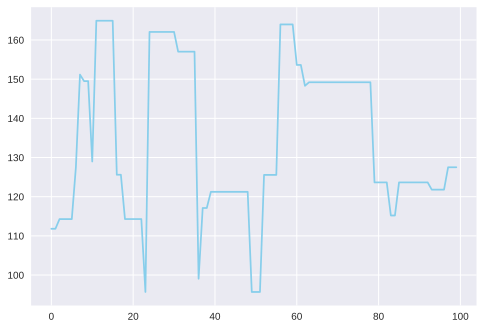

[4, 1, 3, 0, 2]


In [28]:
best, history = genetic_algorithm(
    cities,
    adjacency_mat,
    n_iter=100,
    verbose=False,
    print_interval=20,
    return_history=True,
)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)
